In [1]:
from google.colab import drive # Uncomment first time running notebook
drive.mount('/content/drive') # Uncomment first time running notebook

Mounted at /content/drive


This notebook implements a Multinomial Naive Bayes classifier using raw token counts as vector input as well as TF-IDF vectors.

It is adapted from https://towardsdatascience.com/algorithms-for-text-classification-part-1-naive-bayes-3ff1d116fdd8

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, \
recall_score, precision_score, f1_score, plot_confusion_matrix, plot_roc_curve

In [4]:
### GLOBAL VARIABLES ###
BASE_DIR = "drive/Shareddrives/Advanced ML Project Spring 2021/intermediate_data/"
BALANCE = True # Use downsampled balanced dataset
DECIMALS = 2 # For rounding decimal places

train = pd.read_csv(BASE_DIR + "train_balanced_2001-2019.csv").drop(columns=['Unnamed: 0'])
#validate = pd.read_csv(BASE_DIR + "validate_balanced_2010-2018.csv").drop(columns=['Unnamed: 0'])
test = pd.read_csv(BASE_DIR + "test_balanced_2001-2019.csv").drop(columns=['Unnamed: 0'])
train = train.sample(frac=1)

# Remove third outcome, which is ambiguous and almost never occurs, leading to greater class imbalance
train = train[train['partyWinning'] != 2.0]
test = test[test['partyWinning'] != 2.0]

# Separate predeictors from targets for training
X_train, y_train = train['text'], train['partyWinning']
X_test, y_test = test['text'], test['partyWinning']

In [9]:
def report(y_test, preds):
    '''
    Function to calculate and print major classification evaluation
    statistics.
    '''
    accuracy = round(accuracy_score(y_test, preds), DECIMALS)
    recall = round(recall_score(y_test, preds), DECIMALS)
    precision = round(precision_score(y_test, preds), DECIMALS)
    f1 = round(f1_score(y_test, preds), DECIMALS)

    print("Accuracy: " + str(accuracy) + '\n')
    print("Precision: " + str(precision) + '\n')
    print("Recall: " + str(recall) + '\n')
    print("F1: " + str(f1) + '\n')


Accuracy: 0.53

Precision: 0.52

Recall: 0.88

F1: 0.65



**Initial count-based naive bayes model**

In [7]:
vect = CountVectorizer(lowercase=True, stop_words='english')
vect = vect.fit(X_train)
X_train_vectorized = vect.transform(X_train)
clfrNB = MultinomialNB(alpha = 0.1)
clfrNB.fit(X_train_vectorized, y_train)
preds = clfrNB.predict(vect.transform(X_test))
score = roc_auc_score(y_test, preds)
print(score)

0.5266272189349112


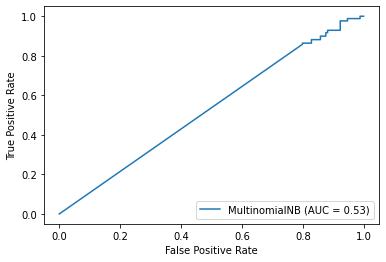

In [8]:
plot_roc_curve(clfrNB, vect.transform(X_test), y_test)

In [ ]:
report(y_test, preds)

**Tf-idf naive bayes model**

In [10]:
vect = TfidfVectorizer(lowercase=True, stop_words='english')
vect = vect.fit(X_train)
X_train_vectorized = vect.transform(X_train)
clfrNB = MultinomialNB(alpha = 0.1)
clfrNB.fit(X_train_vectorized, y_train)
preds = clfrNB.predict(vect.transform(X_test))
score = roc_auc_score(y_test, preds)
print(score)

0.5384615384615384


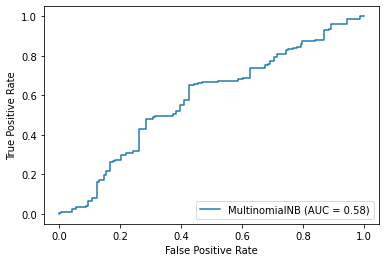

In [11]:
plot_roc_curve(clfrNB, vect.transform(X_test), y_test)

In [12]:
report(y_test, preds)

Accuracy: 0.54

Precision: 0.53

Recall: 0.75

F1: 0.62



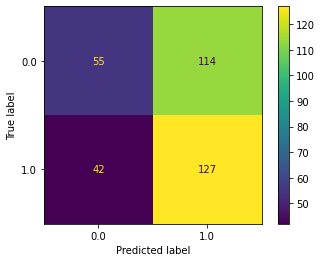

In [16]:
plot_confusion_matrix(clfrNB, vect.transform(X_test), y_test, values_format = '.5g')

**### TESTING SMALLER SUBSETS OF DATA TO LOOK FOR PATTERNS ###**

2010-2018 only, tf-idf vectorizer

In [19]:
### TESTING SMALLER SUBSETS OF DATA TO LOOK FOR PATTERNS ###

train = pd.read_csv(BASE_DIR + "train_balanced_2010-2018.csv").drop(columns=['Unnamed: 0'])
#validate = pd.read_csv(BASE_DIR + "validate_balanced_2010-2018.csv").drop(columns=['Unnamed: 0'])
test = pd.read_csv(BASE_DIR + "test_balanced_2010-2018.csv").drop(columns=['Unnamed: 0'])
train = train.sample(frac=1)

# Remove third outcome, which is ambiguous and almost never occurs, leading to greater class imbalance
train = train[train['partyWinning'] != 2.0]
test = test[test['partyWinning'] != 2.0]

# Separate predeictors from targets for training
X_train, y_train = train['text'], train['partyWinning']
X_test, y_test = test['text'], test['partyWinning']

In [20]:
vect = TfidfVectorizer(lowercase=True, stop_words='english')
vect = vect.fit(X_train)
X_train_vectorized = vect.transform(X_train)
clfrNB = MultinomialNB(alpha = 0.1)
clfrNB.fit(X_train_vectorized, y_train)
preds = clfrNB.predict(vect.transform(X_test))
score = roc_auc_score(y_test, preds)
print(score)

0.5555555555555556


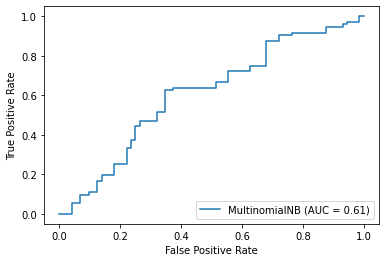

In [21]:
plot_roc_curve(clfrNB, vect.transform(X_test), y_test)

In [23]:
report(y_test, preds)

Accuracy: 0.56

Precision: 0.54

Recall: 0.74

F1: 0.62



**### TESTING SMALLER SUBSETS OF DATA TO LOOK FOR PATTERNS ###**

2001-2009 only, tf-idf vectorizer

In [ ]:
### TESTING SMALLER SUBSETS OF DATA TO LOOK FOR PATTERNS ###

train = pd.read_csv(BASE_DIR + "train_balanced_2001-2009.csv").drop(columns=['Unnamed: 0'])
#validate = pd.read_csv(BASE_DIR + "validate_balanced_2010-2018.csv").drop(columns=['Unnamed: 0'])
test = pd.read_csv(BASE_DIR + "test_balanced_2001-2009.csv").drop(columns=['Unnamed: 0'])
train = train.sample(frac=1)

# Remove third outcome, which is ambiguous and almost never occurs, leading to greater class imbalance
train = train[train['partyWinning'] != 2.0]
test = test[test['partyWinning'] != 2.0]

# Separate predeictors from targets for training
X_train, y_train = train['text'], train['partyWinning']
X_test, y_test = test['text'], test['partyWinning']

In [ ]:
vect = TfidfVectorizer(lowercase=True, stop_words='english')
vect = vect.fit(X_train)
X_train_vectorized = vect.transform(X_train)
clfrNB = MultinomialNB(alpha = 0.1)
clfrNB.fit(X_train_vectorized, y_train)
preds = clfrNB.predict(vect.transform(X_test))
score = roc_auc_score(y_test, preds)
print(score)

0.5478723404255319


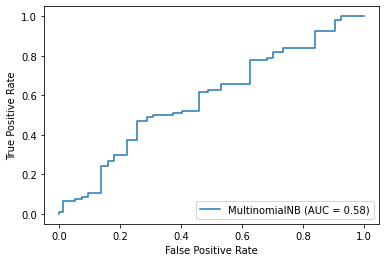

In [ ]:
plot_roc_curve(clfrNB, vect.transform(X_test), y_test)

In [ ]:
report(y_test, preds)

Accuracy: 0.55

Precision: 0.54

Recall: 0.72

F1: 0.62



**### TESTING SMALLER SUBSETS OF DATA TO LOOK FOR PATTERNS ###**

2004-2006 only, tf-idf vectorizer

In [ ]:
### TESTING SMALLER SUBSETS OF DATA TO LOOK FOR PATTERNS ###

train = pd.read_csv(BASE_DIR + "train_balanced_2004-2006.csv").drop(columns=['Unnamed: 0'])
#validate = pd.read_csv(BASE_DIR + "validate_balanced_2010-2018.csv").drop(columns=['Unnamed: 0'])
test = pd.read_csv(BASE_DIR + "test_balanced_2004-2006.csv").drop(columns=['Unnamed: 0'])
train = train.sample(frac=1)

# Remove third outcome, which is ambiguous and almost never occurs, leading to greater class imbalance
train = train[train['partyWinning'] != 2.0]
test = test[test['partyWinning'] != 2.0]

# Separate predeictors from targets for training
X_train, y_train = train['text'], train['partyWinning']
X_test, y_test = test['text'], test['partyWinning']

0.5478723404255319
Accuracy: 0.55

Precision: 0.54

Recall: 0.72

F1: 0.62



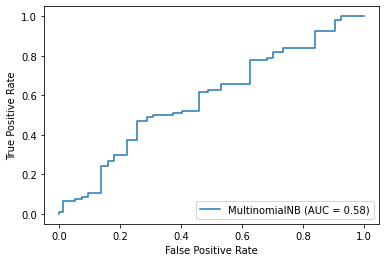

In [ ]:
vect = TfidfVectorizer(lowercase=True, stop_words='english')
vect = vect.fit(X_train)
X_train_vectorized = vect.transform(X_train)
clfrNB = MultinomialNB(alpha = 0.1)
clfrNB.fit(X_train_vectorized, y_train)
preds = clfrNB.predict(vect.transform(X_test))
score = roc_auc_score(y_test, preds)
print(score)
plot_roc_curve(clfrNB, vect.transform(X_test), y_test)
report(y_test, preds)